# **Experimenting on Fish**

We showcase various experiments on simulated zebrafish.

# Imports

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

import sys
sys.path.append('../') # assumes notebook started from brightfish/notebooks
import brightfish
import brightfish.environment as environment
import brightfish.fish as fish

# Sinusoidal Environment

First, we'll need to create an environment for the fish to operate in. We'll use the simple 1D sinusoidal environment for now:

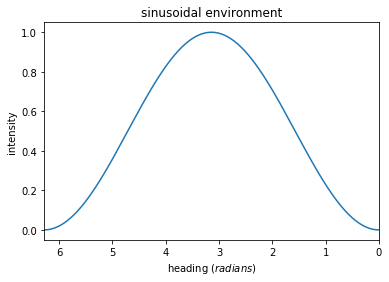

In [2]:
e = environment.SinusoidalCircle(201, static=True)
fig = plt.figure()
plt.plot(np.linspace(e.start, e.stop, num=e.shape), e.stage)
plt.xlim(2*np.pi, 0)
plt.title("sinusoidal environment")
plt.xlabel(r"heading ($radians$)")
plt.ylabel("intensity")
plt.show()

Next, we'll have to create a fish:

In [3]:
f = brightfish.fish.BinocularFish(2.1, learning_rate=5e-3)
print(f)

BinocularFish: heading: 2.10 set_point: 0.50 p_left: 0.50 p_right: 0.50


Now that we have a fish, we can allow the fish to simulate some time in the environment and observe the change in parameters:

In [4]:
params = f.run(e, 1000)

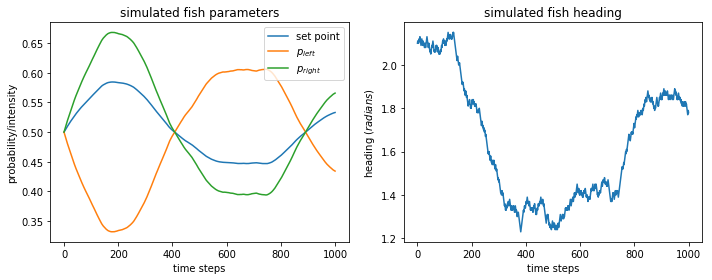

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))
axs[0].plot(np.arange(1001), params[:,1], label="set point")
axs[0].plot(np.arange(1001), params[:,2], label=r"$p_{left}$")
axs[0].plot(np.arange(1001), params[:,3], label=r"$p_{right}$")
axs[0].set_title("simulated fish parameters")
axs[0].set_xlabel("time steps")
axs[0].set_ylabel("probability/intensity")
axs[0].legend()
axs[1].plot(np.arange(1001), params[:,0], label="heading")
axs[1].set_title("simulated fish heading")
axs[1].set_xlabel("time steps")
axs[1].set_ylabel(r"heading ($radians$)")
fig.tight_layout()
plt.show()